In [1]:
! pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 47.0 MB/s 


In [2]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [ ]:
!pip install NLTK
import nltk
nltk.download('punkt')

In [128]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

from konlpy.tag import Okt
okt = Okt()

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
# 구글 드라이브 불러오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [129]:
# 파일 업로드
path = '/content/drive/MyDrive/공부/TM/독서기록.csv'
df = pd.read_csv(path)

,문장
0,"결국 주식이란, ‘자신의 기질에 맞는 값과 기준을 찾아가는 게임’이기 때문이다."
1,"아무리 ‘고수’라고 칭해지는 사람들의 조언을 따라 한다고 한들, 그것은 하나의 ..."
2,"주가창을 바라볼 때 지금 이 순간 같은 주가창을 바라보고 있을 수천, 수만 명의 삶..."
3,"주식시장의 고전적 명언 중 하나는 바로 “매수는 기술이지만, 매도는 예술이다”라는 ..."
4,"물론 매수가 투자의 출발점이기에 당연한 이야기지만, 그와 같은 양의 생각과 시간을 ..."
...,...
123,"새로운 일을 시도하고, 위험을 무릅쓰고, 넘어지고, 상처받고, 그러고도 더 많은 위..."
124,활을 만든 나무처럼 유연하고 길 위의 신호들을 이해할 수 있는 사람들과 어울려라. ...
125,"""이제 끝이야. 여기서 멈출 거야""라고 말하는 사람들을 경계해라. 겨울 뒤에 반드시..."
126,"동작은 동사가 형태를 갖춘 것이다. 다시 말해, 행동은 겉으로 표현된 생각이다. 사..."


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      128 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [34]:
df.isnull().sum()

문장    0
dtype: int64

In [140]:
# Text Cleaning
goal_list = []
for k in range(len(df['문장'])):
    goal = re.sub(r'[^\s\w]', ' ', df['문장'][k]) # cleaning
    goal_list.append(goal)

In [141]:
# Cleaning 결과 저장하기
df['문장_클리닝'] = goal_list
df

,문장,문장_클리닝
0,"결국 주식이란, ‘자신의 기질에 맞는 값과 기준을 찾아가는 게임’이기 때문이다.",결국 주식이란 자신의 기질에 맞는 값과 기준을 찾아가는 게임 이기 때문이다
1,"아무리 ‘고수’라고 칭해지는 사람들의 조언을 따라 한다고 한들, 그것은 하나의 ...",아무리 고수 라고 칭해지는 사람들의 조언을 따라 한다고 한들 그것은 하나의 ...
2,"주가창을 바라볼 때 지금 이 순간 같은 주가창을 바라보고 있을 수천, 수만 명의 삶...",주가창을 바라볼 때 지금 이 순간 같은 주가창을 바라보고 있을 수천 수만 명의 삶...
3,"주식시장의 고전적 명언 중 하나는 바로 “매수는 기술이지만, 매도는 예술이다”라는 ...",주식시장의 고전적 명언 중 하나는 바로 매수는 기술이지만 매도는 예술이다 라는 ...
4,"물론 매수가 투자의 출발점이기에 당연한 이야기지만, 그와 같은 양의 생각과 시간을 ...",물론 매수가 투자의 출발점이기에 당연한 이야기지만 그와 같은 양의 생각과 시간을 ...
...,...,...
123,"새로운 일을 시도하고, 위험을 무릅쓰고, 넘어지고, 상처받고, 그러고도 더 많은 위...",새로운 일을 시도하고 위험을 무릅쓰고 넘어지고 상처받고 그러고도 더 많은 위...
124,활을 만든 나무처럼 유연하고 길 위의 신호들을 이해할 수 있는 사람들과 어울려라. ...,활을 만든 나무처럼 유연하고 길 위의 신호들을 이해할 수 있는 사람들과 어울려라 ...
125,"""이제 끝이야. 여기서 멈출 거야""라고 말하는 사람들을 경계해라. 겨울 뒤에 반드시...",이제 끝이야 여기서 멈출 거야 라고 말하는 사람들을 경계해라 겨울 뒤에 반드시...
126,"동작은 동사가 형태를 갖춘 것이다. 다시 말해, 행동은 겉으로 표현된 생각이다. 사...",동작은 동사가 형태를 갖춘 것이다 다시 말해 행동은 겉으로 표현된 생각이다 사...


In [142]:
goal_text = ' '.join(df['문장_클리닝'])
print(goal_text)

결국 주식이란   자신의 기질에 맞는 값과 기준을 찾아가는 게임 이기 때문이다    아무리  고수 라고 칭해지는 사람들의 조언을 따라 한다고 한들  그것은 하나의 방향등일 뿐  성공 투자로 가는 지름길이 될 수는 없다  사람은 각자가 가진 생각의 방향  마음의 습관  행동의 방법이 다 달라서  아무리 똑같은 인풋이라고 하더라도 결국 아웃풋은 각양각색이다 따라서 고수들의 말 자체는 정답에 가깝다고 하더라도  내가 그것을 적용시키는 순간에 나의 생각  습관  행동에 따라서 다시  가능성의 가능성 이 된다  주가창을 바라볼 때 지금 이 순간 같은 주가창을 바라보고 있을 수천  수만 명의 삶을 동시에 봐야 한다  그들의 생각이 어느 방향으로 흐록 있는지  왜 그들을 그렇게 생각하고 있는지를 함께 감안해야 한다  나 혼자 뛰는 게임이 아니라  나를 포함한 무리들이 뛰는 관점으로 주가창을 바라볼 때  조금 더 예측력이 높아질 수 있을 것이다  주식시장의 고전적 명언 중 하나는 바로  매수는 기술이지만  매도는 예술이다 라는 말이다  기술과 예술의 차이  잘 알겠지만 기술은 어느 정도 익히면 누구나할 수 있다  하지만 기술이 예술의 경지에까지 오르기 위해서는 보통의 노력으로는 쉽지 않은 일이다  주식공부를 어느 정도만이라도 했으면 매수의 기준을 잡는 일은그리 어렵지 않다  그런데 매도는 그런 것이 없다  오르면 오를수록 좋은 것이라 생각하기 때문에 스스로 기준을 정하기 힘들다    바로 여기에서 자신을 멈추지 못하는 충동이 시작된다  마음속으로  조금 더  조금 더 를 외치면  결국 돈에 대한 충동이 자신을 지배하는 순간이 오고야 만다  그런데 이 충동은 주가가 오를 만큼 올랐음에도 불구하고  혹은 이제 서서히 떨어질 시그널을 보내고 있음에도 불구하고  그것을 믿지 못하게 만든다  욕심이 쌓여 만들어진 과도한 기대감이 현실을 부정하는 묘한 왜곡이 일어나게 된다는 이야기다  물론 매수가 투자의 출발점이기에 당연한 이야기지만  그와 같은 양의 생각과 시간을 어떻게 팔까   얼

In [143]:
# 클리닝 + 스테밍 + 품사 필터링
goal_text = re.sub(r'[^\s\w]', ' ', goal_text) 

def pos_filtering(text): 
    pos_word_list = okt.pos(text, stem = True) 
    pos_list = ['Noun', 'Verb', 'Adjective']
    pos_filtered_word_list = []

    for word, pos in pos_word_list:
        if pos in pos_list:
            pos_filtered_word_list.append(word)

    return pos_filtered_word_list

In [144]:
goal_text

'결국 주식이란   자신의 기질에 맞는 값과 기준을 찾아가는 게임 이기 때문이다    아무리  고수 라고 칭해지는 사람들의 조언을 따라 한다고 한들  그것은 하나의 방향등일 뿐  성공 투자로 가는 지름길이 될 수는 없다  사람은 각자가 가진 생각의 방향  마음의 습관  행동의 방법이 다 달라서  아무리 똑같은 인풋이라고 하더라도 결국 아웃풋은 각양각색이다 따라서 고수들의 말 자체는 정답에 가깝다고 하더라도  내가 그것을 적용시키는 순간에 나의 생각  습관  행동에 따라서 다시  가능성의 가능성 이 된다  주가창을 바라볼 때 지금 이 순간 같은 주가창을 바라보고 있을 수천  수만 명의 삶을 동시에 봐야 한다  그들의 생각이 어느 방향으로 흐록 있는지  왜 그들을 그렇게 생각하고 있는지를 함께 감안해야 한다  나 혼자 뛰는 게임이 아니라  나를 포함한 무리들이 뛰는 관점으로 주가창을 바라볼 때  조금 더 예측력이 높아질 수 있을 것이다  주식시장의 고전적 명언 중 하나는 바로  매수는 기술이지만  매도는 예술이다 라는 말이다  기술과 예술의 차이  잘 알겠지만 기술은 어느 정도 익히면 누구나할 수 있다  하지만 기술이 예술의 경지에까지 오르기 위해서는 보통의 노력으로는 쉽지 않은 일이다  주식공부를 어느 정도만이라도 했으면 매수의 기준을 잡는 일은그리 어렵지 않다  그런데 매도는 그런 것이 없다  오르면 오를수록 좋은 것이라 생각하기 때문에 스스로 기준을 정하기 힘들다    바로 여기에서 자신을 멈추지 못하는 충동이 시작된다  마음속으로  조금 더  조금 더 를 외치면  결국 돈에 대한 충동이 자신을 지배하는 순간이 오고야 만다  그런데 이 충동은 주가가 오를 만큼 올랐음에도 불구하고  혹은 이제 서서히 떨어질 시그널을 보내고 있음에도 불구하고  그것을 믿지 못하게 만든다  욕심이 쌓여 만들어진 과도한 기대감이 현실을 부정하는 묘한 왜곡이 일어나게 된다는 이야기다  물론 매수가 투자의 출발점이기에 당연한 이야기지만  그와 같은 양의 생각과 시간을 어떻게 팔까   

In [145]:
# 단어 리스트 생성
word_list = pos_filtering(goal_text)
print('총 {}개의 단어'.format(len(word_list)))

총 6213개의 단어


### 불용어처리 하지 않은 버전의 워드클라우드

In [146]:
c = Counter(word_list)

num = 100 # 상위 100개 단어만 출력
print(c.most_common(num))

[('하다', 522), ('있다', 173), ('것', 127), ('사람', 112), ('수', 108), ('되다', 96), ('않다', 67), ('내', 65), ('그', 63), ('없다', 55), ('생각', 51), ('아니다', 48), ('일', 43), ('자신', 41), ('나', 40), ('이다', 38), ('때', 36), ('어떻다', 35), ('그렇다', 34), ('싶다', 30), ('논문', 28), ('인생', 26), ('때문', 25), ('이', 25), ('말', 24), ('읽다', 24), ('선택', 23), ('만들다', 22), ('우리', 22), ('좋다', 21), ('시간', 20), ('보다', 19), ('더', 19), ('무엇', 19), ('자다', 18), ('이해', 18), ('나이', 18), ('찾다', 18), ('위', 17), ('당신', 17), ('다른', 16), ('후회', 16), ('데이터', 16), ('마음', 15), ('삶', 15), ('필요하다', 15), ('되어다', 15), ('의미', 15), ('본인', 15), ('질문', 15), ('안', 15), ('가다', 14), ('순간', 14), ('스스로', 14), ('결정', 14), ('중요하다', 14), ('맞다', 13), ('따르다', 13), ('그것', 13), ('살', 13), ('대학원', 13), ('자기', 13), ('모든', 13), ('이렇다', 13), ('대한', 12), ('이야기', 12), ('이유', 12), ('꼭', 12), ('진짜', 12), ('통해', 12), ('연구', 12), ('위해', 12), ('결혼', 12), ('판단', 12), ('상황', 12), ('들다', 11), ('방법', 11), ('다시', 11), ('같다', 11), ('바로', 11), ('공부', 11), ('시작', 11), ('말다', 11)

In [147]:
!pip install wordcloud
from wordcloud import WordCloud
word_dict = dict(c.most_common(100)) 

# 워드클라우드 설정하기
wc = WordCloud(font_path = 'NanumGothic.ttf',
               background_color= 'white',
               width = 3000, height = 2000,
               min_font_size = 10)

cloud = wc.generate_from_frequencies(word_dict) # 딕셔너리 형태로 저장되어 있어야 합니다.

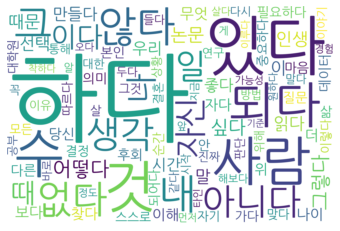

In [148]:
# 워드 클라우드 출력하기
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('독서기록 워드클라우드_명사동사형용사.png', bbox_inches='tight', dpi = 300)
plt.show()

In [149]:
nouns_list = okt.nouns(goal_text)
#nouns_list = stopword(nouns_list) #불용어처리

In [150]:
# 명사 워드 클라우드 만들기
c = Counter(nouns_list)

num = 100 # 상위 100개 단어만 출력
print(c.most_common(num))

[('것', 127), ('사람', 112), ('수', 108), ('내', 65), ('그', 63), ('생각', 51), ('일', 43), ('자신', 41), ('나', 40), ('때', 36), ('논문', 28), ('인생', 26), ('때문', 25), ('이', 25), ('말', 24), ('선택', 23), ('우리', 22), ('시간', 20), ('더', 19), ('무엇', 19), ('이해', 18), ('나이', 18), ('위', 17), ('당신', 17), ('다른', 16), ('후회', 16), ('데이터', 16), ('마음', 15), ('삶', 15), ('의미', 15), ('본인', 15), ('질문', 15), ('안', 15), ('순간', 14), ('스스로', 14), ('결정', 14), ('그것', 13), ('살', 13), ('대학원', 13), ('자기', 13), ('모든', 13), ('대한', 12), ('이야기', 12), ('이유', 12), ('꼭', 12), ('진짜', 12), ('통해', 12), ('연구', 12), ('위해', 12), ('결혼', 12), ('판단', 12), ('상황', 12), ('방법', 11), ('다시', 11), ('바로', 11), ('공부', 11), ('시작', 11), ('알', 11), ('게', 11), ('가능성', 10), ('지금', 10), ('정도', 10), ('앞', 10), ('경험', 10), ('먼저', 10), ('타인', 10), ('기준', 9), ('방향', 9), ('행동', 9), ('따라서', 9), ('노력', 9), ('사실', 9), ('또한', 9), ('남', 9), ('문제', 9), ('줄', 9), ('척', 9), ('주식', 8), ('투자', 8), ('이제', 8), ('집중', 8), ('고민', 8), ('인정', 8), ('능력', 8), ('인간', 8), ('주변', 8),

In [151]:
word_dict = dict(c.most_common(num))
cloud = wc.generate_from_frequencies(word_dict)

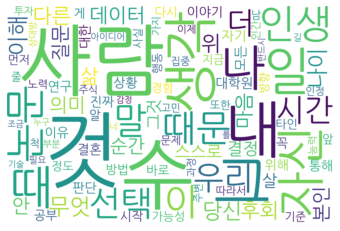

In [152]:
# 워드 클라우드 출력하기
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('독서기록 워드클라우드_명사.png', bbox_inches='tight', dpi = 300)
plt.show()

### 불용어처리를 한 버전의 워드클라우드

In [153]:
#불용어처리
stop = "것,수,그,때,때문,위,더,이,안,살,자기,위해,통해,따라서,통한,줄,척,를,알,게,또한,가지,대한,후,번,등,대로,옷,점,몇,여러분,뿐,중,걸,함"
stop_list = stop.split(',')
tok = word_tokenize(goal_text)

def stopword(word_tokenize):
  result = []

  for w in word_tokenize:
    if w not in stop_list:
      result.append(w)

  return result

In [154]:
word_list = stopword(word_list)
c = Counter(word_list)

In [155]:
num = 100 # 상위 100개 단어만 출력
print(c.most_common(num))
word_dict = dict(c.most_common(100)) 

[('하다', 522), ('있다', 173), ('사람', 112), ('되다', 96), ('않다', 67), ('내', 65), ('없다', 55), ('생각', 51), ('아니다', 48), ('일', 43), ('자신', 41), ('나', 40), ('이다', 38), ('어떻다', 35), ('그렇다', 34), ('싶다', 30), ('논문', 28), ('인생', 26), ('말', 24), ('읽다', 24), ('선택', 23), ('만들다', 22), ('우리', 22), ('좋다', 21), ('시간', 20), ('보다', 19), ('무엇', 19), ('자다', 18), ('이해', 18), ('나이', 18), ('찾다', 18), ('당신', 17), ('다른', 16), ('후회', 16), ('데이터', 16), ('마음', 15), ('삶', 15), ('필요하다', 15), ('되어다', 15), ('의미', 15), ('본인', 15), ('질문', 15), ('가다', 14), ('순간', 14), ('스스로', 14), ('결정', 14), ('중요하다', 14), ('맞다', 13), ('따르다', 13), ('그것', 13), ('대학원', 13), ('모든', 13), ('이렇다', 13), ('이야기', 12), ('이유', 12), ('꼭', 12), ('진짜', 12), ('연구', 12), ('결혼', 12), ('판단', 12), ('상황', 12), ('들다', 11), ('방법', 11), ('다시', 11), ('같다', 11), ('바로', 11), ('공부', 11), ('시작', 11), ('말다', 11), ('두다', 11), ('해보다', 11), ('가능성', 10), ('지금', 10), ('정도', 10), ('오다', 10), ('살다', 10), ('앞', 10), ('경험', 10), ('원하다', 10), ('먼저', 10), ('타인', 10), ('이루다', 10), 

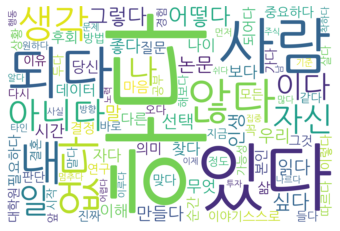

In [156]:
cloud = wc.generate_from_frequencies(word_dict)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('독서기록 불용어처리 워드클라우드_명사동사형용사.png', bbox_inches='tight', dpi = 300)
plt.show()

In [157]:
nouns_list = okt.nouns(goal_text)
nouns_list = stopword(nouns_list) #불용어처리

c = Counter(nouns_list)

In [158]:
#상위 100개 단어만 출력
num = 100 
print(c.most_common(num))

[('사람', 112), ('내', 65), ('생각', 51), ('일', 43), ('자신', 41), ('나', 40), ('논문', 28), ('인생', 26), ('말', 24), ('선택', 23), ('우리', 22), ('시간', 20), ('무엇', 19), ('이해', 18), ('나이', 18), ('당신', 17), ('다른', 16), ('후회', 16), ('데이터', 16), ('마음', 15), ('삶', 15), ('의미', 15), ('본인', 15), ('질문', 15), ('순간', 14), ('스스로', 14), ('결정', 14), ('그것', 13), ('대학원', 13), ('모든', 13), ('이야기', 12), ('이유', 12), ('꼭', 12), ('진짜', 12), ('연구', 12), ('결혼', 12), ('판단', 12), ('상황', 12), ('방법', 11), ('다시', 11), ('바로', 11), ('공부', 11), ('시작', 11), ('가능성', 10), ('지금', 10), ('정도', 10), ('앞', 10), ('경험', 10), ('먼저', 10), ('타인', 10), ('기준', 9), ('방향', 9), ('행동', 9), ('노력', 9), ('사실', 9), ('남', 9), ('문제', 9), ('주식', 8), ('투자', 8), ('이제', 8), ('집중', 8), ('고민', 8), ('인정', 8), ('능력', 8), ('인간', 8), ('주변', 8), ('과정', 8), ('아이디어', 8), ('필요', 8), ('길', 8), ('부분', 8), ('상대방', 8), ('너', 8), ('조금', 7), ('기술', 7), ('누구', 7), ('반드시', 7), ('감정', 7), ('생활', 7), ('현재', 7), ('세상', 7), ('지식', 7), ('다음', 7), ('끝', 7), ('평가', 7), ('빵', 7), ('책',

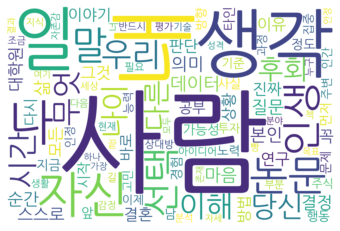

In [161]:
word_dict = dict(c.most_common(num))
cloud = wc.generate_from_frequencies(word_dict)

# 워드 클라우드 출력하기
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('독서기록 불용어처리 워드클라우드_명사.png', bbox_inches='tight', dpi = 300)
plt.show()